In [5]:
import pandas as pd

df3 = pd.read_csv('kddcup3.csv')
dense3 = pd.read_csv('dense_output2.csv')
print("Read {} rows.".format(len(df3)))
print("Read {} rows.".format(len(dense3)))

# df = df.sample(frac=0.1, replace=False) # Uncomment this line to sample only 10% of the dataset

df3.dropna(inplace=True,axis=1) # For now, just drop NA's (rows with missing values)
dense3.dropna(inplace=True,axis=1) # For now, just drop NA's (rows with missing values)

# The CSV file has no column heads, so add them
df3.columns = [
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'outcome'
]

# display 5 rows
df3[0:5]

Read 494020 rows.
Read 494020 rows.


,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,outcome
0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,normal
1,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,normal
2,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,normal
3,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,normal
4,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,normal


In [6]:
dense3[0:5]

,output_neuron_1,output_neuron_2,output_neuron_3,output_neuron_4,output_neuron_5,output_neuron_6,output_neuron_7,output_neuron_8,output_neuron_9,output_neuron_10,...,output_neuron_89,output_neuron_90,output_neuron_91,output_neuron_92,output_neuron_93,output_neuron_94,output_neuron_95,output_neuron_96,output_neuron_97,output_neuron_98
0,-0.067792,-0.002879,0.138664,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,0.0,-0.009782,2.396994,-0.005679,-0.010552,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632
1,-0.067792,-0.002820,-0.011578,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,0.0,-0.009782,2.396994,-0.005679,-0.010552,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632
2,-0.067792,-0.002824,0.014179,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,0.0,-0.009782,2.396994,-0.005679,-0.010552,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632
3,-0.067792,-0.002840,0.014179,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,0.0,-0.009782,2.396994,-0.005679,-0.010552,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632
4,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,0.0,-0.009782,2.396994,-0.005679,-0.010552,-0.004676,-0.00564,-0.011232,-0.009919,-0.027632


In [7]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

    
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [8]:
encode_numeric_zscore(df3, 'is_host_login')
encode_numeric_zscore(df3, 'is_guest_login')
encode_numeric_zscore(df3, 'count')
encode_numeric_zscore(df3, 'srv_count')
encode_numeric_zscore(df3, 'serror_rate')
encode_numeric_zscore(df3, 'srv_serror_rate')
encode_numeric_zscore(df3, 'rerror_rate')
encode_numeric_zscore(df3, 'srv_rerror_rate')
encode_numeric_zscore(df3, 'same_srv_rate')
encode_numeric_zscore(df3, 'diff_srv_rate')

In [9]:
df3[0:5]

,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,outcome
0,NaN,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
1,NaN,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
2,NaN,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
3,NaN,-0.037263,-1.530804,-1.164761,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
4,NaN,-0.037263,-1.530804,-1.164761,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal


In [10]:
df3.dropna(inplace=True,axis=1) # For now, just drop NA's (rows with missing values)
df3[0:5]

,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,outcome
0,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
1,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
2,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
3,-0.037263,-1.530804,-1.164761,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
4,-0.037263,-1.530804,-1.164761,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal


In [11]:
merged_df3 = pd.concat([dense3, df3], axis=1)

In [12]:
merged_df3[0:5]

,output_neuron_1,output_neuron_2,output_neuron_3,output_neuron_4,output_neuron_5,output_neuron_6,output_neuron_7,output_neuron_8,output_neuron_9,output_neuron_10,...,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,outcome
0,-0.067792,-0.002879,0.138664,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
1,-0.067792,-0.002820,-0.011578,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
2,-0.067792,-0.002824,0.014179,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
3,-0.067792,-0.002840,0.014179,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,-0.037263,-1.530804,-1.164761,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
4,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,-0.037263,-1.530804,-1.164761,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal


In [13]:
merged_df3.dropna(inplace=True,axis=1) # For now, just drop NA's (rows with missing values)


In [14]:
merged_df3[0:5]

,output_neuron_1,output_neuron_2,output_neuron_3,output_neuron_4,output_neuron_5,output_neuron_6,output_neuron_7,output_neuron_8,output_neuron_9,output_neuron_10,...,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,outcome
0,-0.067792,-0.002879,0.138664,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
1,-0.067792,-0.002820,-0.011578,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
2,-0.067792,-0.002824,0.014179,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,-0.037263,-1.521420,-1.156642,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
3,-0.067792,-0.002840,0.014179,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,-0.037263,-1.530804,-1.164761,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal
4,-0.067792,-0.002842,0.035214,-0.04772,-0.002571,-0.044136,-0.249464,0.0,1.0,0.0,...,-0.037263,-1.530804,-1.164761,-0.46409,-0.463521,-0.24796,-0.248631,0.536988,-0.255243,normal


In [15]:
# Convert to numpy - Classification
x_columns3 = merged_df3.columns.drop('outcome')
x3 = merged_df3[x_columns3].values
dummies3 = pd.get_dummies(merged_df3['outcome']) # Classification
outcomes3 = dummies3.columns
num_classes3 = len(outcomes3)
y3 = dummies3.values

In [16]:
merged_df3.groupby('outcome')['outcome'].count()

outcome
back                 2203
buffer_overflow        30
ftp_write               8
guess_passwd           53
imap                   12
ipsweep              1247
land                   21
loadmodule              9
multihop                7
neptune            107201
nmap                  231
normal              97277
perl                    3
phf                     4
pod                   264
portsweep            1040
rootkit                10
satan                1589
smurf              280790
spy                     2
teardrop              979
warezclient          1020
warezmaster            20
Name: outcome, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
from IPython.display import display, HTML 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


x3_train, x3_test, y3_train, y3_test = train_test_split(
    x3, y3, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(25, input_dim=x3.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(x3.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')

#SAVE THE OUTPUT NEURONS
# Convert the output into a Pandas dataframe
pd3 = pd.DataFrame(x3, columns=['output_neuron_{}'.format(i+1) for i in range(x3.shape[1])])

# Save the output to a CSV file
pd3.to_csv('dense_output3.csv', index=False)

2023-09-07 08:32:08.947463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 08:32:14.330284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
11579/11579 - 28s - loss: 0.1087 - accuracy: 0.9738 - val_loss: 0.0464 - val_accuracy: 0.9862 - 28s/epoch - 2ms/step
Epoch 2/1000
11579/11579 - 29s - loss: 0.0486 - accuracy: 0.9884 - val_loss: 0.0382 - val_accuracy: 0.9891 - 29s/epoch - 2ms/step
Epoch 3/1000
11579/11579 - 29s - loss: 0.0460 - accuracy: 0.9891 - val_loss: 0.0358 - val_accuracy: 0.9890 - 29s/epoch - 2ms/step
Epoch 4/1000
11579/11579 - 28s - loss: 0.0385 - accuracy: 0.9890 - val_loss: 0.0348 - val_accuracy: 0.9888 - 28s/epoch - 2ms/step
Epoch 5/1000
11579/11579 - 28s - loss: 0.0348 - accuracy: 0.9894 - val_loss: 0.0341 - val_accuracy: 0.9925 - 28s/epoch - 2ms/step
Epoch 6/1000
11579/11579 - 31s - loss: 0.0334 - accuracy: 0.9909 - val_loss: 0.0397 - val_accuracy: 0.9904 - 31s/epoch - 3ms/step
Epoch 7/1000
11579/11579 - 31s - loss: 0.0324 - accuracy: 0.9915 - val_loss: 0.0334 - val_accuracy: 0.9924 - 31s/epoch - 3ms/step
Epoch 8/1000
11579/11579 - 30s - loss: 0.0486 - accuracy: 0.9917 - val_loss: 0.0329 - val_

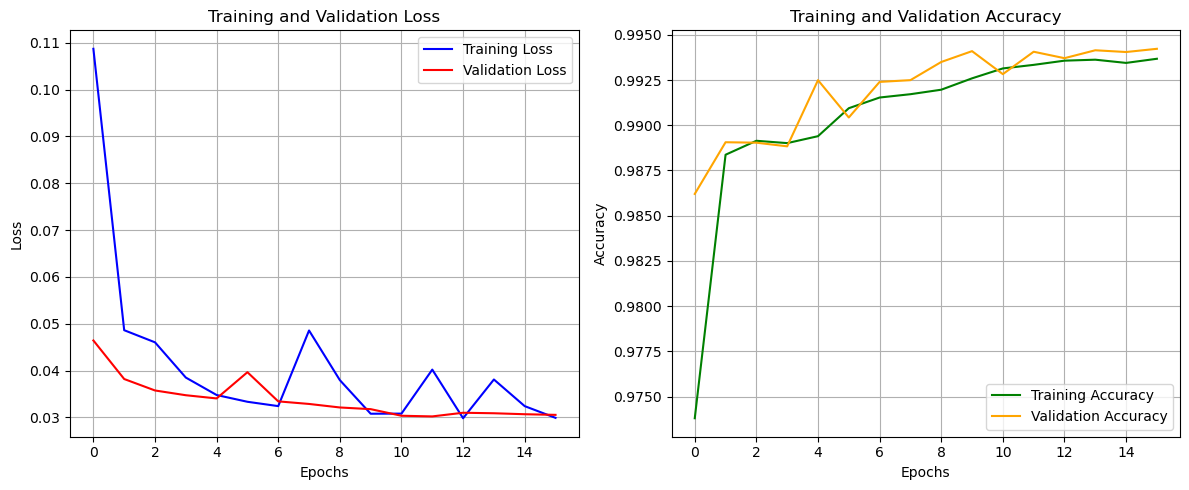

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(10, input_dim=x3.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=x3.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=x3.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y3.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

# Train the model and record history
history = model.fit(x3_train, y3_train, validation_data=(x3_test, y3_test), callbacks=[monitor], verbose=2, epochs=1000)

# Extract training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']  # Use 'accuracy' here
val_accuracy = history.history['val_accuracy']  # Use 'val_accuracy' here

# Create subplots to display loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', color='green')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:
import numpy as np

# Measure accuracy
pred = model.predict(x3_test)
print(pred)
print("_____________________________________________________________")
pred = np.argmax(pred,axis=1)
print(pred)
print("_____________________________________________________________")
y_eval = np.argmax(y3_test,axis=1)
print(y_eval)
print("_____________________________________________________________")
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

3860/3860 [==============================] - 5s 1ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 4.6890477e-28 3.8811330e-21 ... 0.0000000e+00
  5.0296120e-22 4.5339454e-26]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.2516438e-28 2.2159438e-06 9.2876244e-06 ... 5.7721887e-28
  9.2053483e-04 3.6405979e-06]]
_____________________________________________________________
[18 18  9 ... 18 18 11]
_____________________________________________________________
[18 18  9 ... 18 18 11]
_____________________________________________________________
Validation score: 0.9931338812193838


In [24]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_eval, pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  539     0     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0]
 [    2     0     0     0     0     0     0     0     0     0     0    10
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     2
      0     0     8     0     0     0     0     0     0]
 [    0     0     0     0     0     1     0     0     0     0     0     1
      0     0     0     0     1     0     0     0     0]
 [    0     0     0     0     0   300     0     0     0     0     0     2
      0     0     0     0    24     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     1     0     6
      0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0    

3860/3860 [==============================] - 5s 1ms/step


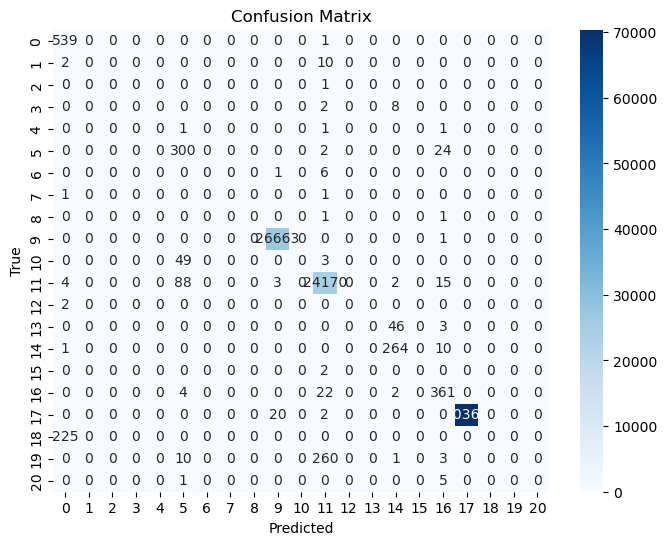

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is your trained classification model
# 'x3_test' contains the validation input data, and 'y3_test' contains the true labels

# Make predictions on the validation data
y_pred = model.predict(x3_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y3_test, axis=1), y_pred)

# Define class labels based on your variable names
class_labels = ["Normal", "Anomaly"]  # Replace with your actual class labels

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# PRECISIOn

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
# Replace 'y_true' and 'y_pred' with your actual data

# Calculate precision, recall, and F1-score
precision = precision_score(y_eval, pred, average='weighted')
recall = recall_score(y_eval, pred, average='weighted')
f1 = f1_score(y_eval, pred, average='weighted')

# Print the results
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))


# Create a table with the results
#table = [["Metric", "Score"],
 #        ["Precision", "{:.4f}".format(precision)],
  #       ["Recall", "{:.4f}".format(recall)],
   #      ["F1-Score", "{:.4f}".format(f1)]]

# Print the table
#print(tabulate(table, headers="firstrow", tablefmt="grid"))

Precision: 0.9890
Recall: 0.9931
F1-Score: 0.9908


/Users/zaarr/opt/anaconda3/envs/Tensorflow_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

# train_losses and val_losses are lists of training and validation losses, respectively
# n_epochs is the total number of training epochs

def plot_validation_score(train_losses, val_losses, n_epochs):
    # Create a list of epoch numbers
    epochs = range(1, n_epochs+1)

    # Plot training and validation losses over epochs
    plt.plot(epochs, train_losses, label='Training loss')
    plt.plot(epochs, val_losses, label='Validation loss')

    # Set plot title and axis labels
    plt.title('Validation score')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()

In [ ]:
model3 = Sequential()
model3.add(Dense(25, input_dim=x3.shape[1], activation='relu'))
model3.add(Dense(3, activation='relu'))
model3.add(Dense(25, activation='relu'))
model3.add(Dense(1, kernel_initializer='normal'))
model3.add(Dense(y3.shape[1],activation='softmax'))
model3.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x,x,verbose=1,epochs=100)
# model.fit(y,y,verbose=1,epochs=1000)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model3.fit(x3_train,y3_train,validation_data=(x3_test,y3_test),callbacks=[monitor],verbose=2,epochs=1000)

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_eval, axis=1)
rounded_labels


In [ ]:


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
cm


In [ ]:

# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
